# Introduction
In a study in France, the physical activity of volunteers was analysed. In order to collect the necessary data, the study asked 900 volunteers to measure their physical activity using a Fitbit. 
This document contains the data cleaning and data analysis of this study.

## Data cleaning

First, it is important to clean and select the data. For this study we will focus on the average number of steps per participant between 20-6-2013 and 13-5-2014.

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('Data sets for in-class exercises/steps.csv', sep=";")
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('Data sets for in-class exercises/survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [3]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
def above_200(x):
    if(x > 200.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_200)
def below_40(x):
    if(x < 40): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_40)

In [5]:
df['mean'] = df.loc[:, '20-6-2013':'13-5-2014'].mean(axis=1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


## Exploratory data analysis
### An analysis of mean steps per participant
A graph showing the distribution of the number of steps per user can be found below. The red line represents the median and the blue line the mean. On this graph we can see that the median and the mean are more or less at the same level. The vast majority of the participants have an average of less than 25 000 steps. However, some outliers appear, such as an individual who took 200 000 steps. For the sake of readability and considering the possibility that this outlier is an error. This is not shown on the graphs but remains present in the database.

C:\Users\Maude\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


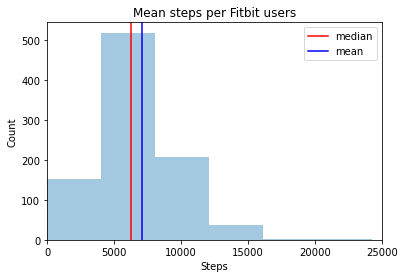

In [30]:
sns.distplot(df['mean'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Mean steps per Fitbit users')
plt.xlabel('Steps')
plt.ylabel('Count')
mean_size = df['mean'].mean()
median_size = df['mean'].median()
plt.axvline(median_size, 0, 100, color='red', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.xlim(0, 25000)
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

### The relation of mean steps per participant with weight and gender
In the graph below showing the relationship of mean steps per participant with weight and gender, we can see that the majority of women are under 60kg. Furthermore, the only outliers are women. This means that according to the data women are lighter and more athletic than men. Overweight people (over 100kg) are generally men who walk less than the average user.

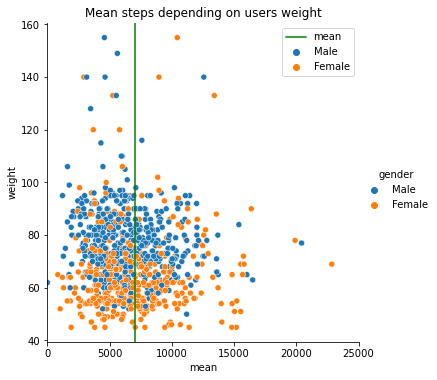

In [44]:
sns.relplot(x="mean", y="weight", hue="gender", data=df)
plt.title('Mean steps depending on users weight')
mean_size = df['mean'].mean()
plt.axvline(mean_size, 0, 100, color='green', label='mean') 
plt.xlim(0, 25000)
plt.legend()

## Feature engineering
For a better indication of a healthy weight, the Body Mass Index (BMI) will be calculated based on weight and height. This will be put in a variable as follow BMI = weight[kg] / height<sup>2</sup>[m<sup>2</sup>]

In [8]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean,BMI
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423


## Exploratory data analysis
Below is a scatterplot of the height and the weight.

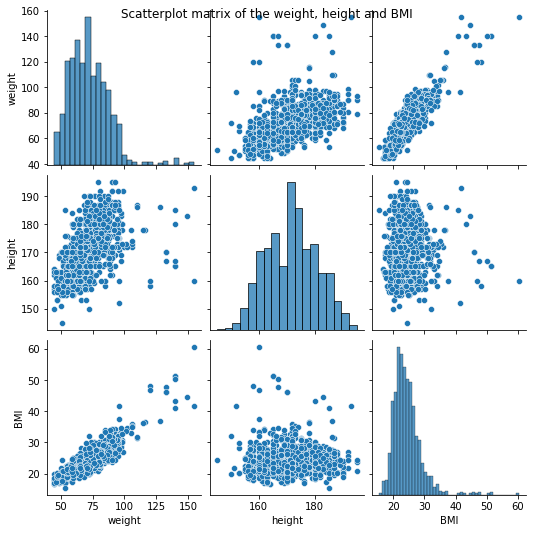

In [9]:
df_subset = df[['weight','height','BMI']]
sns.pairplot(df_subset)
plt.suptitle('Scatterplot matrix of the weight, height and BMI')
plt.show()

There is a linear correlation between weight and BMI. Most people have a BMI of less than 40, which goes hand in hand with the fact that most people weigh less than 100kg. There is no relationship between height and weight or between height and BMI.

Text(0.5, 0.98, 'Correlation matrix of the weight, height and BMI')

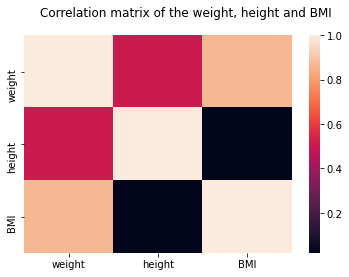

In [10]:
sns.heatmap(df_subset.corr())
plt.suptitle('Correlation matrix of the weight, height and BMI')

This correlation matrix shows that there is no correlation between height and BMI (black colour). However there is a correlation of 0.8 between weight and BMI. An average correlation of about 0.5 exists between weight and height. This correlation matrix shows the same conclusions as the previous matrix.

## Predictive model
A linear regression is a model which can make prediction based on known values.
Factor that can influence the mean of steps is the age, the city or the gender of the participant. For this excercice we will use the categorical variable age.

In [17]:
df_dummies = pd.get_dummies(df['age'])
df = pd.concat([df, df_dummies], axis=1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,Bordeaux,Lille,Lyon,Montpellier,25-34,35-44,45-54,55-64,65+,<25
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,1,0,0,0,1,0,0,0,0,0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0,1,0,0,0,1,0,0,0,0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0,0,0,1,1,0,0,0,0,0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,1,0,0,0,0,0


Now we are going to fit a linear regression model to determine the coefficients of the mean steps per participant in order to predict it. To do this, we will divide our dataframe into two parts: training and testing. 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x = df[['<25','25-34', '35-44', '45-54', '55-64', '65+']]
# There are some mean values equal to NaN
df['mean'] = df['mean'].round(decimals =2)
df['mean'] = df['mean'].fillna(0)
df = df.drop(df[df['mean'] == 0].index)
y = df['mean']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

lm = LinearRegression()
lm.fit(x_train, y_train) #this "fits" the model

LinearRegression()

In [19]:
y_test_p = lm.predict(x_test)

## Evaluation
Here we are going to evaluate the model on the test data. 

The scatterplot below shows that the model overestimates the number of steps up to 7000 and underestimates the number of steps beyond that.

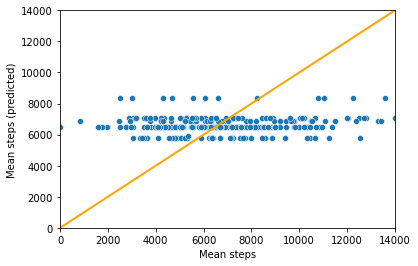

In [39]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 14000)
plt.ylim(0, 14000) 
plt.plot([0, 1.5e6], [0, 1.5e6], color='orange', lw=2)
plt.xlabel('Mean steps')
plt.ylabel('Mean steps (predicted)')
plt.show()

By calculating the R<sup>2</sup> it is possible to determine the explainable variation of the model.

In [20]:
r2_score(y_test, y_test_p)

-0.01678769612838593

The RMSE calculates how much the prediction differs.

In [32]:
import math
math.sqrt(mean_squared_error(y_test, y_test_p))

12541.386667546574

We can conclude that the R<sup>2</sup> is negative which means that the model is unable to predict anything. I must have made a mistake somewhere or otherwise it means that the test sample is very different from the training sample. The RMSE is 12541 steps. This means that we are usually off by about 12541 steps in our predictions.

In [40]:
lm2 = LinearRegression() #create a new (empty model)
lm2.fit(x, y) #fit the model with all the data
y_p = lm.predict(x)
r2_score(y, y_p) 

-0.0045374522408130336

By running the model on all the data and not just the test data, the R<sup>2</sup> is less negative which is normal since the training data is also used.

# Conclusion
Through this exercise I was able to show that there is a correlation between the weight and the BMI of the participants in the study. It is difficult for me to draw any conclusions about the rest of the exercise as I think I made mistakes on the Evaluation part. As it stands, the model created is unable to predict anything to the point where chance is more likely to be right. 